# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organising Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](kohonen.png)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

### Example 10x10 network after 100 iterations

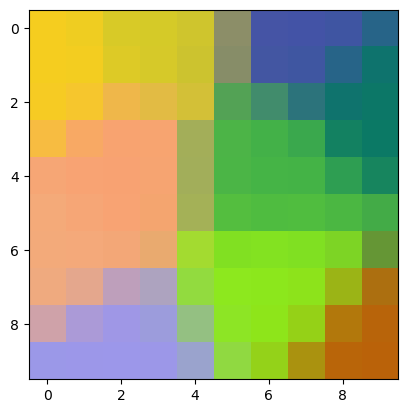

In [11]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

### Example 100x100 network after 1000 iterations

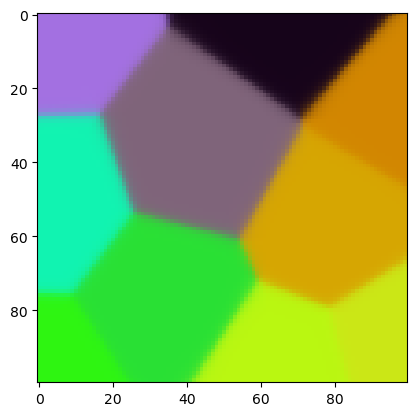

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

## Challenge

Sam has written an implementation of a Self Organising Map. Consider the following criteria when assessing Sam's code:

- Could the code be made more efficient? A literal interpretation of the instructions above is not necessary.

Sh: To make the code more efficient vectorization has been used to replace loops (width and height). A mask is used to mask the nodes in the grid and influence is calculated for the masked nodes in the grids. The weights are there by only changed for the masked nodes and for the remaining nodes the delta is 0 so the weights are not updates


- Is the code best structured for later use by other developers and in anticipation of productionisation?

Sh: No, the current code code is not best structured for productionisation and later use for other developers for the following reasons:
1. Lack of comments in code to highlight the functionality of different parts of the code
2. Code is not written in an object oriented manner making it less efficient for reusability and scalability. With an object oriented approach it will be easier to add features and makes it easier for collaboration.
3. Code is not written in a manner to reduce the time and space complexity. For cases where there are higher width, height and max_iterations, the code would not scale well as there is a section in code which has o(n2) time complexity which can be replaced by a simple mask to make it more efficient.


- How would you approach productionising this application?

Sh: Some things I would do to productionise the code:

1. Write code in an object oriented manner for better scalability, maintenance, reusability.
2. To avoid package related errors, replace package data structures by pythonic data structures 
3. Add comments for better readability
4. Expose the training pipeline through an API endpoint which can be called
5. Instead of using matplotlib library to plot, the weights can be plotted using other tools such as PowerBI or Tableau on the front end since the results will be available on a different interface, which may not contain python


- Anything else you think is relevant.

Sh: Some obeservations regarding the implementation of the kohonen algorithm:

1. The current implementations starts with a radius by using max(height, width)/2 which is the radius of the meshgrid itself. However the meshgrid doesn't represent where the nodes actually lie relative to each other. For example nodes closer to the bmu may not be similar to the bmu. It may be more appropriate to use a different method to initialize the radius that represents how close the nodes are relative to each other. 

2. If we do decide to use the radius of the meshgrid itself as the starting radius, then another approach may be to order the weights in the order of euclidean distance from the bmu first, then do the masking. This way the nodes most similar to the bmu will be selected for an update at each time step. For example in the first iteration since the radius is the largest all nodes will be updated whereas in the last time step, only nodes which are most similar (lowest euclidean distance) to the bmu will be updated



In [7]:
import numpy as np
from sklearn.decomposition import PCA
import math

class KohonenSOM:
    def __init__(self, width, height, input_size, max_iterations=100):
        self.width = width
        self.height = height
        self.input_size = input_size
        self.max_iterations = max_iterations
        
        # Initialize weights randomly
        self.weights = np.random.rand(width, height, input_size)
        
        # Time constant lambda
        self.sigma0 = max(width, height) / 2
        self.lambd = max_iterations / math.log(self.sigma0)

        # Precompute meshgrid for grid coordinates
        self.x_coords, self.y_coords = np.meshgrid(np.arange(self.width), np.arange(self.height), indexing='ij')

    def find_bmu(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=2)
        bmu_index = np.unravel_index(np.argmin(distances), distances.shape)
        return bmu_index

    def get_pca_coords(self):
        flat_weights = self.weights.reshape(-1, self.input_size)
        pca = PCA(n_components=2)
        pca_coords = pca.fit_transform(flat_weights)
        return pca_coords.reshape(self.width, self.height, 2)

    def train(self, training_data):
        for iteration in range(self.max_iterations):
            np.random.shuffle(training_data)
            
            sigma_t = self.sigma0 * math.exp(-iteration / self.lambd)
            alpha_t = 0.1 * math.exp(-iteration / self.lambd)
            
            pca_coords = self.get_pca_coords()
            
            for input_vector in training_data:
                bmu_x, bmu_y = self.find_bmu(input_vector)
                bmu_pca = pca_coords[bmu_x, bmu_y]
                
                # Calculate distances in PCA space
                dists = np.sqrt(np.sum((pca_coords - bmu_pca) ** 2, axis=2))
                
                # Mask for nodes within the neighborhood radius
                # mask = dists <= sigma_t

                #MASK using grid coordinates
                grid_dists = np.sqrt((self.x_coords - bmu_x) ** 2 + (self.y_coords - bmu_y) ** 2)
                mask = grid_dists <= sigma_t

                # Print number of masked elements (nodes in the neighborhood)
                print(f"Number of nodes in BMU neighborhood (radius {sigma_t:.4f}): {np.sum(mask)}")
                
                # Influence only for nodes in the neighborhood, else 0
                influence = np.zeros_like(dists)
                influence[mask] = np.exp(-(dists[mask] ** 2) / (2 * sigma_t ** 2))
                
                # Update only nodes within the radius
                delta = (input_vector - self.weights) * alpha_t * influence[..., np.newaxis]
                self.weights += delta  # Nodes outside the radius get 0 update

    def get_weights(self):
        return self.weights


In [ ]:
if __name__ == '__main__':
    # Generate data
    input_data = np.random.random((10,3))
    som = KohonenSOM(10, 10, 3, 100)
    # Train the network
    som.train(input_data)
    image_data = som.get_weights()
    plt.imsave('100.png', image_data)

    input_data = np.random.random((10,3))
    som = KohonenSOM(100, 100, 3, 1000)
    # Train the network
    som.train(input_data)
    image_data = som.get_weights()
    plt.imsave('1000.png', image_data)


Number of nodes in BMU neighborhood (radius 5.0000): 45
Number of nodes in BMU neighborhood (radius 5.0000): 31
Number of nodes in BMU neighborhood (radius 5.0000): 31
Number of nodes in BMU neighborhood (radius 5.0000): 37
Number of nodes in BMU neighborhood (radius 5.0000): 36
Number of nodes in BMU neighborhood (radius 5.0000): 45
Number of nodes in BMU neighborhood (radius 5.0000): 49
Number of nodes in BMU neighborhood (radius 5.0000): 57
Number of nodes in BMU neighborhood (radius 5.0000): 31
Number of nodes in BMU neighborhood (radius 5.0000): 26
Number of nodes in BMU neighborhood (radius 4.9202): 32
Number of nodes in BMU neighborhood (radius 4.9202): 27
Number of nodes in BMU neighborhood (radius 4.9202): 39
Number of nodes in BMU neighborhood (radius 4.9202): 33
Number of nodes in BMU neighborhood (radius 4.9202): 39
Number of nodes in BMU neighborhood (radius 4.9202): 32
Number of nodes in BMU neighborhood (radius 4.9202): 27
Number of nodes in BMU neighborhood (radius 4.92